In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt 

% matplotlib inline
plt.style.use('ggplot')

In [2]:
filename = 'tsco_clean_wide.csv'
data = pd.read_csv(filename)
data = data.where(data['Open'] >0)
data = data.where(data['High'] >0)
data = data.where(data['Low'] >0)
data = data.where(data['Close'] >0)
data = data.where(data['Volume'] >0)
#
data = data.where(data['Open_m1'] >0)
data = data.where(data['High_m1'] >0)
data = data.where(data['Low_m1'] >0)
data = data.where(data['Close_m1'] >0)
data = data.where(data['Volume_m1'] >0)
#
data = data.where(data['Open_m2'] >0)
data = data.where(data['High_m2'] >0)
data = data.where(data['Low_m2'] >0)
data = data.where(data['Close_m2'] >0)
data = data.where(data['Volume_m2'] >0)

#data = data.where(data['Volume'] != '-')
#data = data.where(data['High'] != '-')
data = data.dropna(how='any')
data.head()
#data = data.astype(float)

,Date,next_close_is_high,next_close_is_low,Open,High,Low,Close,Volume,Open_m1,High_m1,Low_m1,Close_m1,Volume_m1,Open_m2,High_m2,Low_m2,Close_m2,Volume_m2
1,30-Mar-17,0.0,1.0,189.35,192.15,188.20,189.00,17279065.0,191.90,191.90,189.22,190.25,16366596.0,190.00,192.00,188.00,191.20,21600784.0
2,29-Mar-17,0.0,1.0,191.90,191.90,189.22,190.25,16366596.0,190.00,192.00,188.00,191.20,21600784.0,189.75,190.55,187.55,189.95,12319546.0
3,28-Mar-17,0.0,1.0,190.00,192.00,188.00,191.20,21600784.0,189.75,190.55,187.55,189.95,12319546.0,190.20,191.87,187.86,191.00,12362046.0
4,27-Mar-17,1.0,0.0,189.75,190.55,187.55,189.95,12319546.0,190.20,191.87,187.86,191.00,12362046.0,187.95,190.35,186.01,189.60,19199245.0
5,24-Mar-17,0.0,1.0,190.20,191.87,187.86,191.00,12362046.0,187.95,190.35,186.01,189.60,19199245.0,188.00,188.75,185.55,185.85,17722411.0


In [3]:
#data.iloc[868]
#data.drop('Date', 1, inplace=True)
#data.drop('Date_m1', 1, inplace=True)
#data = data.apply(pd.to_numeric)
#data.iloc[:, 1:8] = data.iloc[:, 1:8].apply(pd.to_numeric)
data.describe()
#data.columns

#data.where(data['Volume'] == '-').dropna(how='all')

,next_close_is_high,next_close_is_low,Open,High,Low,Close,Volume,Open_m1,High_m1,Low_m1,Close_m1,Volume_m1,Open_m2,High_m2,Low_m2,Close_m2,Volume_m2
count,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3.967000e+03,3967.000000,3967.000000,3967.000000,3967.000000,3.967000e+03,3967.000000,3967.000000,3967.000000,3967.000000,3.967000e+03
mean,0.487522,0.491807,309.606191,312.848621,305.938041,309.392521,2.879238e+07,309.621770,312.863043,305.952153,309.409410,2.880729e+07,309.644495,312.883544,305.972049,309.426426,2.912505e+07
std,0.499907,0.499996,85.514942,86.043057,84.957419,85.468470,4.332879e+07,85.504804,86.031054,84.944907,85.456745,4.338259e+07,85.498260,86.024138,84.936351,85.446820,4.765438e+07
min,0.000000,0.000000,138.600000,139.900000,137.000000,139.200000,8.067000e+03,138.600000,139.900000,137.000000,139.200000,8.067000e+03,138.600000,139.900000,137.000000,139.200000,8.067000e+03
25%,0.000000,0.000000,240.000000,242.750000,236.795000,240.000000,1.532257e+07,240.000000,242.775000,236.920000,240.000000,1.532257e+07,240.000000,242.830000,237.000000,240.000000,1.534273e+07
50%,0.000000,0.000000,318.500000,321.000000,315.300000,318.150000,2.313666e+07,318.500000,321.000000,315.300000,318.150000,2.316123e+07,318.500000,321.000000,315.300000,318.150000,2.318196e+07
75%,1.000000,1.000000,381.075000,385.350000,376.200000,381.050000,3.531167e+07,381.000000,385.350000,376.200000,381.000000,3.532838e+07,381.000000,385.350000,376.250000,381.000000,3.533912e+07
max,1.000000,1.000000,493.000000,494.250000,485.000000,492.000000,1.275697e+09,493.000000,494.250000,485.000000,492.000000,1.275697e+09,493.000000,494.250000,485.000000,492.000000,1.275697e+09


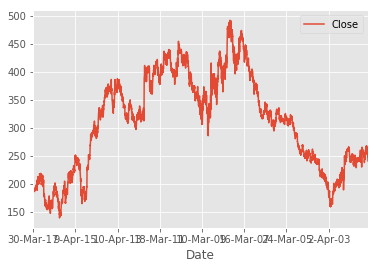

In [4]:
data.plot(x='Date', y='Close')

In [5]:
predictor = data.iloc[:, 3:18]
predictor.head()

,Open,High,Low,Close,Volume,Open_m1,High_m1,Low_m1,Close_m1,Volume_m1,Open_m2,High_m2,Low_m2,Close_m2,Volume_m2
1,189.35,192.15,188.20,189.00,17279065.0,191.90,191.90,189.22,190.25,16366596.0,190.00,192.00,188.00,191.20,21600784.0
2,191.90,191.90,189.22,190.25,16366596.0,190.00,192.00,188.00,191.20,21600784.0,189.75,190.55,187.55,189.95,12319546.0
3,190.00,192.00,188.00,191.20,21600784.0,189.75,190.55,187.55,189.95,12319546.0,190.20,191.87,187.86,191.00,12362046.0
4,189.75,190.55,187.55,189.95,12319546.0,190.20,191.87,187.86,191.00,12362046.0,187.95,190.35,186.01,189.60,19199245.0
5,190.20,191.87,187.86,191.00,12362046.0,187.95,190.35,186.01,189.60,19199245.0,188.00,188.75,185.55,185.85,17722411.0


In [6]:
target = data.iloc[:, 1:3]
target.head()

,next_close_is_high,next_close_is_low
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0


In [7]:
test_ratio = 0.1
print('Total No. of Rows: {}'.format(len(target)))
test_size = int(test_ratio*len(target))
print('Test Set Size: {}' .format(test_size))

test_x = predictor.iloc[:test_size]
test_y = target.iloc[:test_size]

train_x = predictor.iloc[test_size:]
train_y = target.iloc[test_size:]

Total No. of Rows: 3967
Test Set Size: 396


### No Normalisation because quick and dirty 

In [8]:
# Layer definition
def fc_layer(x, channels_in, channels_out, activation = None, name = 'fc'):
    with tf.name_scope(name):
        W = tf.Variable(tf.truncated_normal(shape=[channels_in, channels_out],stddev=0.01),name = 'W')
        b = tf.Variable(tf.constant(0.1, shape=[channels_out]), name = 'b')
        
        if(activation):
            return activation(tf.matmul(x, W) + b)
        else:
            return tf.matmul(x, W) + b

In [11]:
# Main Model
n_input = 15
n_output = 2
n_hidden = 128

learning_rate = 1e-4
epoch = 10
epoch_size = 100
n_iter = epoch * epoch_size


# Create / Reset the graph 
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, n_input])
y_ = tf.placeholder(tf.float32, shape=[None, n_output])
keep_rate = tf.placeholder(tf.float32)

h1 = fc_layer(x, n_input, n_hidden, tf.nn.relu, 'fc_layer_1')
h2 = fc_layer(h1, n_hidden, n_hidden, tf.nn.relu, 'fc_layer_2')
h3 = fc_layer(h2, n_hidden, n_hidden, tf.nn.relu, 'fc_layer_3')
h_dropped = tf.nn.dropout(h3, keep_rate)
h0 = fc_layer(h_dropped, n_hidden, n_output, activation=None, name='output_layer')

hans = tf.nn.softmax(h0)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=h0))

correct_prediction = tf.equal(tf.argmax(h0,1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimiser = tf.train.AdadeltaOptimizer(learning_rate).minimize(cross_entropy)



In [12]:
%%time
# Training 
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for it in range(n_iter+1):
    # No mini batch because dirty 
    optimiser.run(feed_dict={x:train_x.values, y_:train_y.values, keep_rate:0.5})
    
    if it % epoch_size ==0:
        print('Epoch: {:2} cross_entropy: {:6f} accuracy: {:4.3f}%'.format(int(it/epoch_size),
                                                    cross_entropy.eval(feed_dict={x:train_x.values, y_:train_y.values, keep_rate:0.5}),
                                                    100*accuracy.eval(feed_dict={x:train_x.values, y_:train_y.values, keep_rate:0.5})))

print('Test Accuracy: {}' .format(accuracy.eval(feed_dict={x:test_x.values, y_:test_y.values, keep_rate:1.0})))

Epoch:  0 cross_entropy: 181.478821 accuracy: 48.250%
Epoch:  1 cross_entropy: 186.529419 accuracy: 48.950%
Epoch:  2 cross_entropy: 170.863525 accuracy: 48.922%
Epoch:  3 cross_entropy: 186.000275 accuracy: 47.858%
Epoch:  4 cross_entropy: 168.418167 accuracy: 48.978%
Epoch:  5 cross_entropy: 167.724213 accuracy: 50.042%
Epoch:  6 cross_entropy: 149.158569 accuracy: 49.370%
Epoch:  7 cross_entropy: 138.953293 accuracy: 48.250%
Epoch:  8 cross_entropy: 145.351669 accuracy: 47.914%
Epoch:  9 cross_entropy: 127.405350 accuracy: 50.014%
Epoch: 10 cross_entropy: 125.095612 accuracy: 49.510%
Test Accuracy: 0.5454546213150024
CPU times: user 5.27 s, sys: 736 ms, total: 6 s
Wall time: 3.67 s


In [30]:
ans = hans.eval(feed_dict={x:test_x.values, y_:test_y.values, keep_rate:1.0})
labels = test_y.values

In [31]:
ans

array([[ 0.30867782,  0.69132215],
       [ 0.31785727,  0.68214273],
       [ 0.26731074,  0.7326892 ],
       [ 0.36020142,  0.63979858],
       [ 0.35974333,  0.64025664],
       [ 0.28986672,  0.71013331],
       [ 0.30427593,  0.69572407],
       [ 0.2706444 ,  0.72935563],
       [ 0.33507839,  0.66492164],
       [ 0.22465675,  0.7753433 ],
       [ 0.31459734,  0.68540269],
       [ 0.30816463,  0.69183534],
       [ 0.33281854,  0.66718149],
       [ 0.2719191 ,  0.72808087],
       [ 0.23752783,  0.76247215],
       [ 0.15632015,  0.84367979],
       [ 0.27402839,  0.72597164],
       [ 0.25122675,  0.74877328],
       [ 0.28022444,  0.7197755 ],
       [ 0.31064487,  0.68935513],
       [ 0.35092944,  0.64907062],
       [ 0.28931287,  0.7106871 ],
       [ 0.2744216 ,  0.72557843],
       [ 0.3468501 ,  0.6531499 ],
       [ 0.33731782,  0.66268224],
       [ 0.35454014,  0.64545983],
       [ 0.30129412,  0.69870591],
       [ 0.25400981,  0.74599016],
       [ 0.37042835,